https://scanpy-tutorials.readthedocs.io/en/latest/pbmc3k.html - туториал, которым собственно всё ниже и вдохновлено

Scanpy - дополнительный пакет специально для обработки single-cell (sc), использующий для хранения данных свой формат - anndata - аннотированная матрица (по сути исходная матрица экспрессии генов, которую мы могли бы представить как pandas dataframe, только в неё по ходу анализа можно добавлять данные, которые нам дополнительно интересны, напр. митохондриальные гены или высоко экспрессирующиеся и т.д.)

In [1]:
import scanpy as sc

In [2]:
import pyreadr

In [3]:
import pandas as pd

Это sc данные для мнемиопсиса, по столбцам расположены клетки, по строкам - гены.

In [10]:
fileName = "GSM5090101_Nematostella_ACME_sc_umi_matrix.rds" #adata = sc.read_csv('GSM3021563_Mnemiopsis_leidyi_UMI_table.txt
if (fileName[-3:] == "rds"):
    print("yes, it is rds")

yes, it is rds


In [7]:
adata = sc.read('GSM3021563_Mnemiopsis_leidyi_UMI_table.txt')


In [8]:
adata


AnnData object with n_obs × n_vars = 19636 × 4803

In [14]:
pdata = pd.read_csv('GSM3021563_Mnemiopsis_leidyi_UMI_table.txt', delimiter='\t')

In [5]:
rdata = pyreadr.read_r('GSM5090101_Nematostella_ACME_sc_umi_matrix.rds')
rrdata = sc.AnnData(rdata[None])

/tmp/ipykernel_20009/983893486.py:2: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  rrdata = sc.AnnData(rdata[None])


In [15]:
data.head()

,WASP0001001,WASP0001002,WASP0001003,WASP0001005,WASP0001006,WASP0001007,WASP0001009,WASP0001011,WASP0001012,WASP0001013,...,WASP0016364,WASP0016367,WASP0016369,WASP0016370,WASP0016373,WASP0016375,WASP0016380,WASP0016381,WASP0016383,WASP0016384
ML000110a,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ML000112a,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ML000113a,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ML000114a,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
ML000115a,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Я не знаю, почему, но когда scanpy читает данные, он по строкам (n_obs - observations, n_vars - variables) располагает гены, а по столбцам клетки (pandas так же делает, на самом деле). Но по определению формат anndata это матрица размерности n_obs * n_vars, где по строкам должны располагаться клетки, а по столбцам гены (см. слайд 1 в презентации), что в данном случае логично, потому что гены это признаки, а клетки объекты. 

In [16]:
adata


AnnData object with n_obs × n_vars = 19636 × 4803

Поэтому матрицу надо транспонировать и работать дальше уже с ней.

In [12]:
adata=adata.T

In [8]:
rrdata = rrdata.T

In [18]:
adata

AnnData object with n_obs × n_vars = 4803 × 19636

In [13]:
# verbosity просто для того, чтобы после исполнения какой-нибудь фильтрации нулей, в выводе показали, сколько отфильтровалось
sc.settings.verbosity = 3 # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.set_figure_params(dpi=100, facecolor='white')

Не знаю, что можно включить в вывод, кроме самого важного - визуализации и кластеризации (это можно обсудить), но, если что, можно построить такой боксплот наиболее высоко экспрессирующихся генов. 

Вообще, конкретно в этих данных первый ген, судя по графику, какой-то подозрительно слишком высоко экспрессирующийся и его можно на шаге нормализации убрать (при визуализации он здесь автоматически нормализовал, но на самих данных это не отразилось, поэтому далее это нужно делать отдельно). 

##включить в отчет, логарифмировать шкалу, больше генов

normalizing counts per cell
    finished (0:00:01)


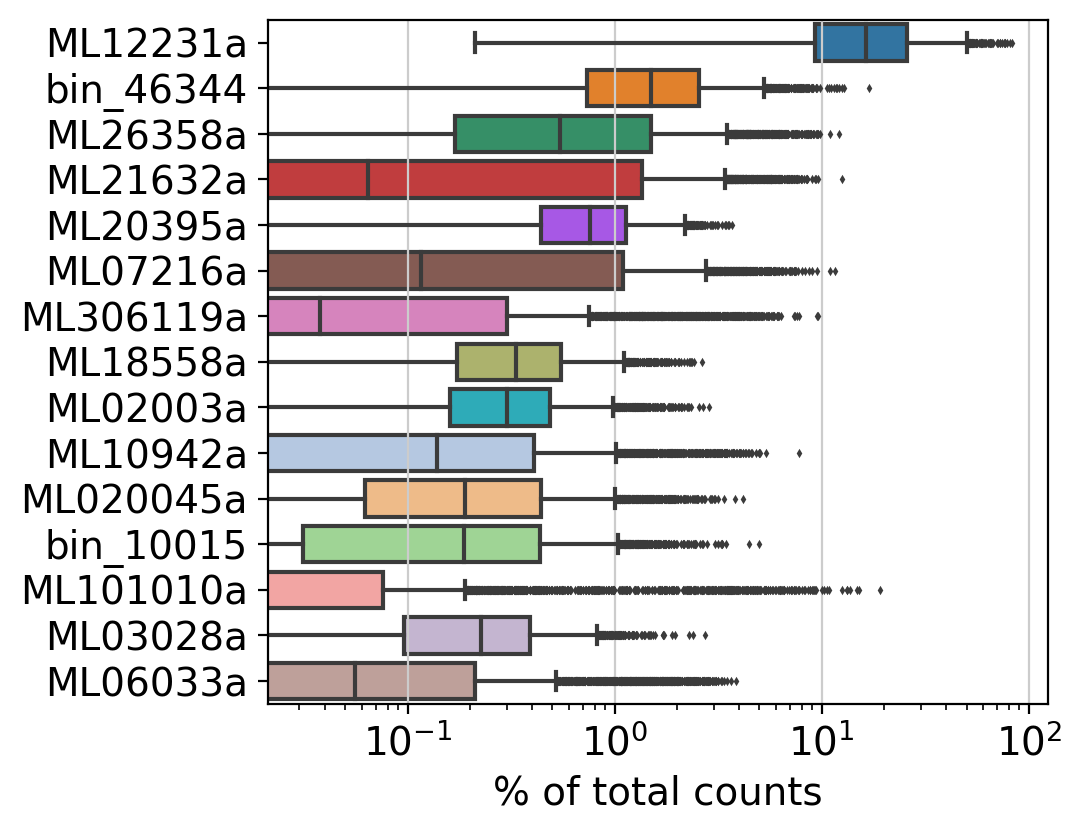

In [14]:
sc.pl.highest_expr_genes(adata, n_top=15, log = True)

In [30]:
adata.var["total_expression"] = adata.X.sum(0)
highest_expr = adata.var['total_expression'].nlargest(10)
#print(adata.var)
print(highest_expr)


WASP0011095    14972.0
WASP0010244    14633.0
WASP0010029    14620.0
WASP0009097    14565.0
WASP0009080    14556.0
WASP0010335    14314.0
WASP0014211    14288.0
WASP0010251    14038.0
WASP0009297    13912.0
WASP0009290    13799.0
Name: total_expression, dtype: float32


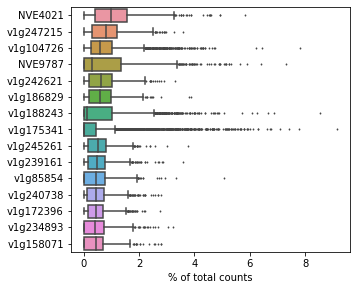

In [9]:
sc.pl.highest_expr_genes(rrdata, n_top=15)

Первые параметры, которые можно варьировать (на основе какого-то биологического знания или анализа того, насколько много исходных данных). 

##показывать параметры, сделать изменение параметров или варианты


In [31]:
sc.pp.filter_cells(adata, min_genes=500)
sc.pp.filter_genes(adata, min_cells=200)

In [16]:
sc.pp.filter_cells(rrdata, min_genes=500)
sc.pp.filter_genes(rrdata, min_cells=200)

NameError: name 'rrdata' is not defined

Нормализация (простейший способ: для каждой клетки - строки - посчитали сумму по столбцам и на неё разделили значения в этой строке). target_sum отвечает за то, сколько будет прочтений на клетку (малые значения не очень хороши для алгоритмов, поэтому надо помножить на какую-нибудь степень). 

Вообще, у этой функции есть 2 хороших параметра (см. слайд 2): exclude_highly_expressed и max_fraction. Если в первом установить true, то гены, в которых экспрессия хотя бы в одной клетке больше, чем max_fraction, не будут учитываться при нормализации. Это важно, но max_fraction принимает значения только от 0 до 1, что странно, т.к. в данном случае я бы установила порог 1000 (тот странный ген сверху имеет максимальное значение порядка 10e3, а все остальные 10е2). Но не могу :( 

https://scanpy.readthedocs.io/en/stable/generated/scanpy.pp.normalize_total.html

In [32]:
sc.pp.normalize_total(adata, target_sum = 1e4)

In [11]:
sc.pp.normalize_total(rrdata, target_sum = 1e4)

In [33]:
#необязательно, но если хотим выделить отдельно далее hihg_exprss_genes, то на вход нужны логарифмированные данные
sc.pp.log1p(adata)

In [12]:
#необязательно, но если хотим выделить отдельно далее hihg_exprss_genes, то на вход нужны логарифмированные данные
sc.pp.log1p(rrdata)

Можно вычислить это, оно сохранится как отдельный столбец в наших данных, который потом по умолчанию используется для построения PCA, но последний можно построить и по всему пространству, так что здесь двояко. Параметров у highly_variable_genes много и можно найти здесь - https://scanpy.readthedocs.io/en/stable/generated/scanpy.pp.highly_variable_genes.html . Я в данном шаге использую по умолчанию. 

дисперсия от среднего, разделить гены на два списка

extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
Highly variable genes: 804


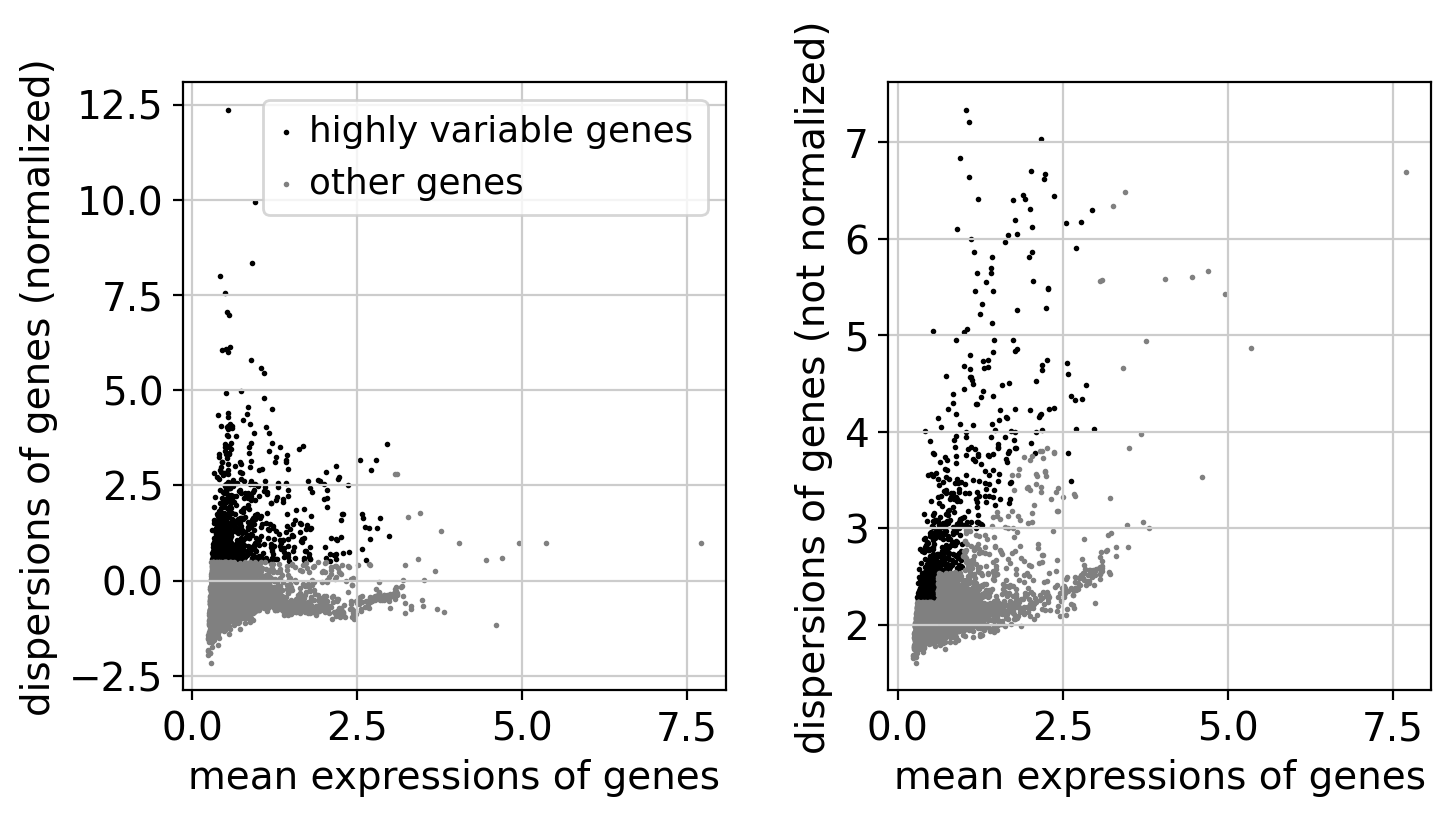

In [19]:
#sc.pp.highly_variable_genes(adata)
#sc.pl.highly_variable_genes(adata)
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
print("Highly variable genes: %d"%sum(adata.var.highly_variable))

#plot variable genes
sc.pl.highly_variable_genes(adata)

# subset for variable genes in the dataset
adata = adata[:, adata.var['highly_variable']]

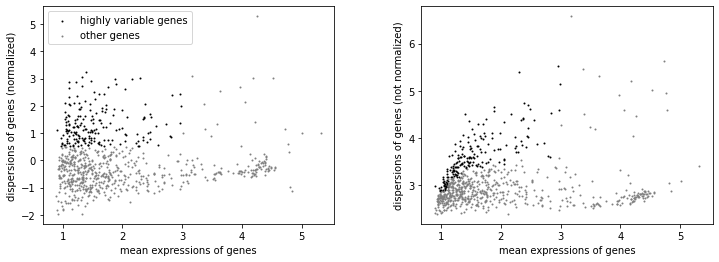

In [13]:
sc.pp.highly_variable_genes(rrdata)
sc.pl.highly_variable_genes(rrdata)

https://scanpy.readthedocs.io/en/stable/generated/scanpy.pp.scale.html тоже использую всё по умолчанию

In [25]:
sc.pp.scale(adata)

In [14]:
sc.pp.scale(rrdata)

In [15]:
#можно посмотреть, что теперь есть у нас из данных
rrdata

AnnData object with n_obs × n_vars = 1438 × 776
    obs: 'n_genes'
    var: 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg'

In [27]:
((adata.var).highly_variable == True).sum()

804

In [16]:
((rrdata.var).highly_variable == True).sum()

184

https://scanpy.readthedocs.io/en/stable/generated/scanpy.pp.pca.html 

По умолчанию здесь исходное пространство, размерность которого хотим понизить, - пространство highly_variable_genes (его размерность 804, в принципе нормально и намного лучше, чем 20e3, которое было).

Также можем понизить размерность всего пространства, его размерность после всех преобразований выше = 4142. 

По умолчанию считается 50 первых компонент, но чтобы потом на графике оценить, как быстро падает процент описываемой дисперсии, можно посчитать побольше.

In [54]:

print(highest_expr.index[0])
print(highest_expr)


WASP0011095
WASP0011095    14972.0
WASP0010244    14633.0
WASP0010029    14620.0
WASP0009097    14565.0
WASP0009080    14556.0
WASP0010335    14314.0
WASP0014211    14288.0
WASP0010251    14038.0
WASP0009297    13912.0
WASP0009290    13799.0
Name: total_expression, dtype: float32


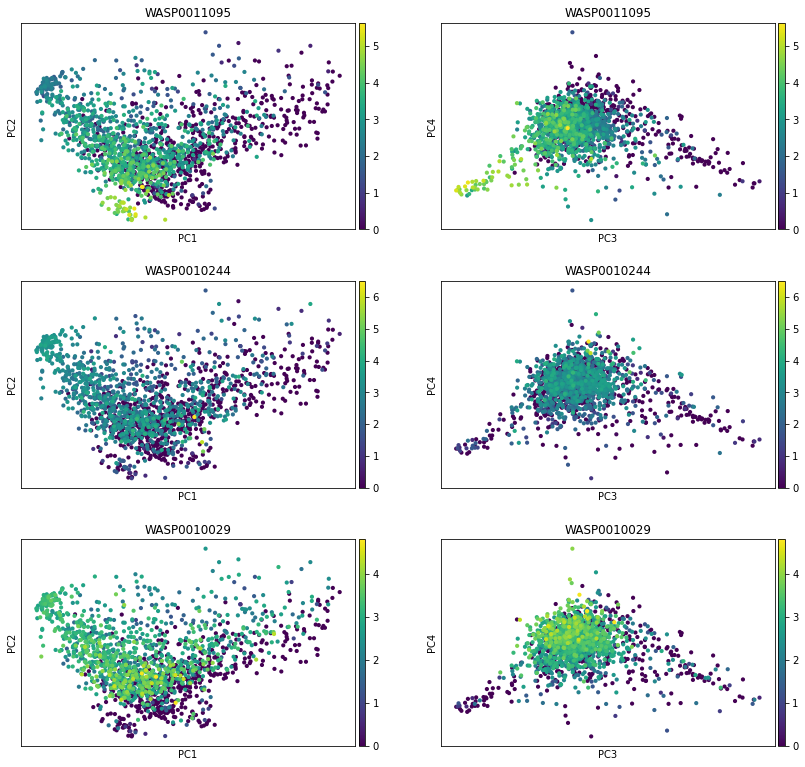

In [60]:
sc.tl.pca(adata, svd_solver='arpack')
sc.pl.pca(adata, color = highest_expr.index[0:3], components = ['1,2','3,4'], ncols = 2)

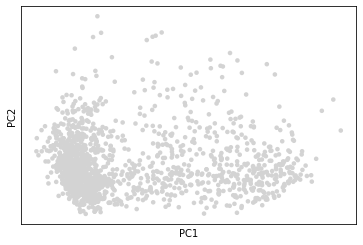

In [17]:
sc.tl.pca(rrdata, n_comps = 100)
sc.pl.pca(rrdata)

На таком графике можно оценить, сколько главных компонент взять для последующего понижения размерности (какой длины хвост справа обрезать). 

##вывод с выбором количества компонент
##предложение оптимального количества (по уменьшению производной или как-то еще)

In [36]:
sc.pl.pca_variance_ratio(rrdata, n_pcs=100, log=True)

NameError: name 'rrdata' is not defined

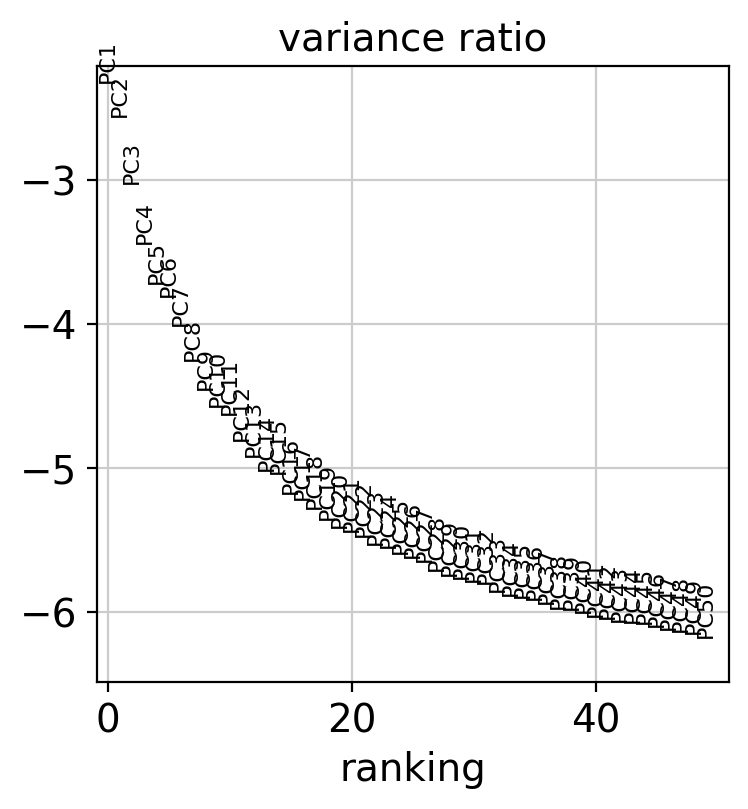

In [39]:
sc.pl.pca_variance_ratio(adata, n_pcs=50, log=True)

На таком графике можно увидеть, какие гены вносят больший/меньший вклад в каждую из первых 3-х главных компонент.

##нужно, для всех выбранных, показывать выборочно

In [54]:
sc.tl.pca_loadings(adata, components = [1, 2, 3, 4, 5, 6, 7, 8])

AttributeError: module 'scanpy.tools' has no attribute 'pca_loadings'

Можно раскрасить после этого в какие-нибудь гены, выбрав,например, из тех, которые вносят больший вклад в каждую компоненту

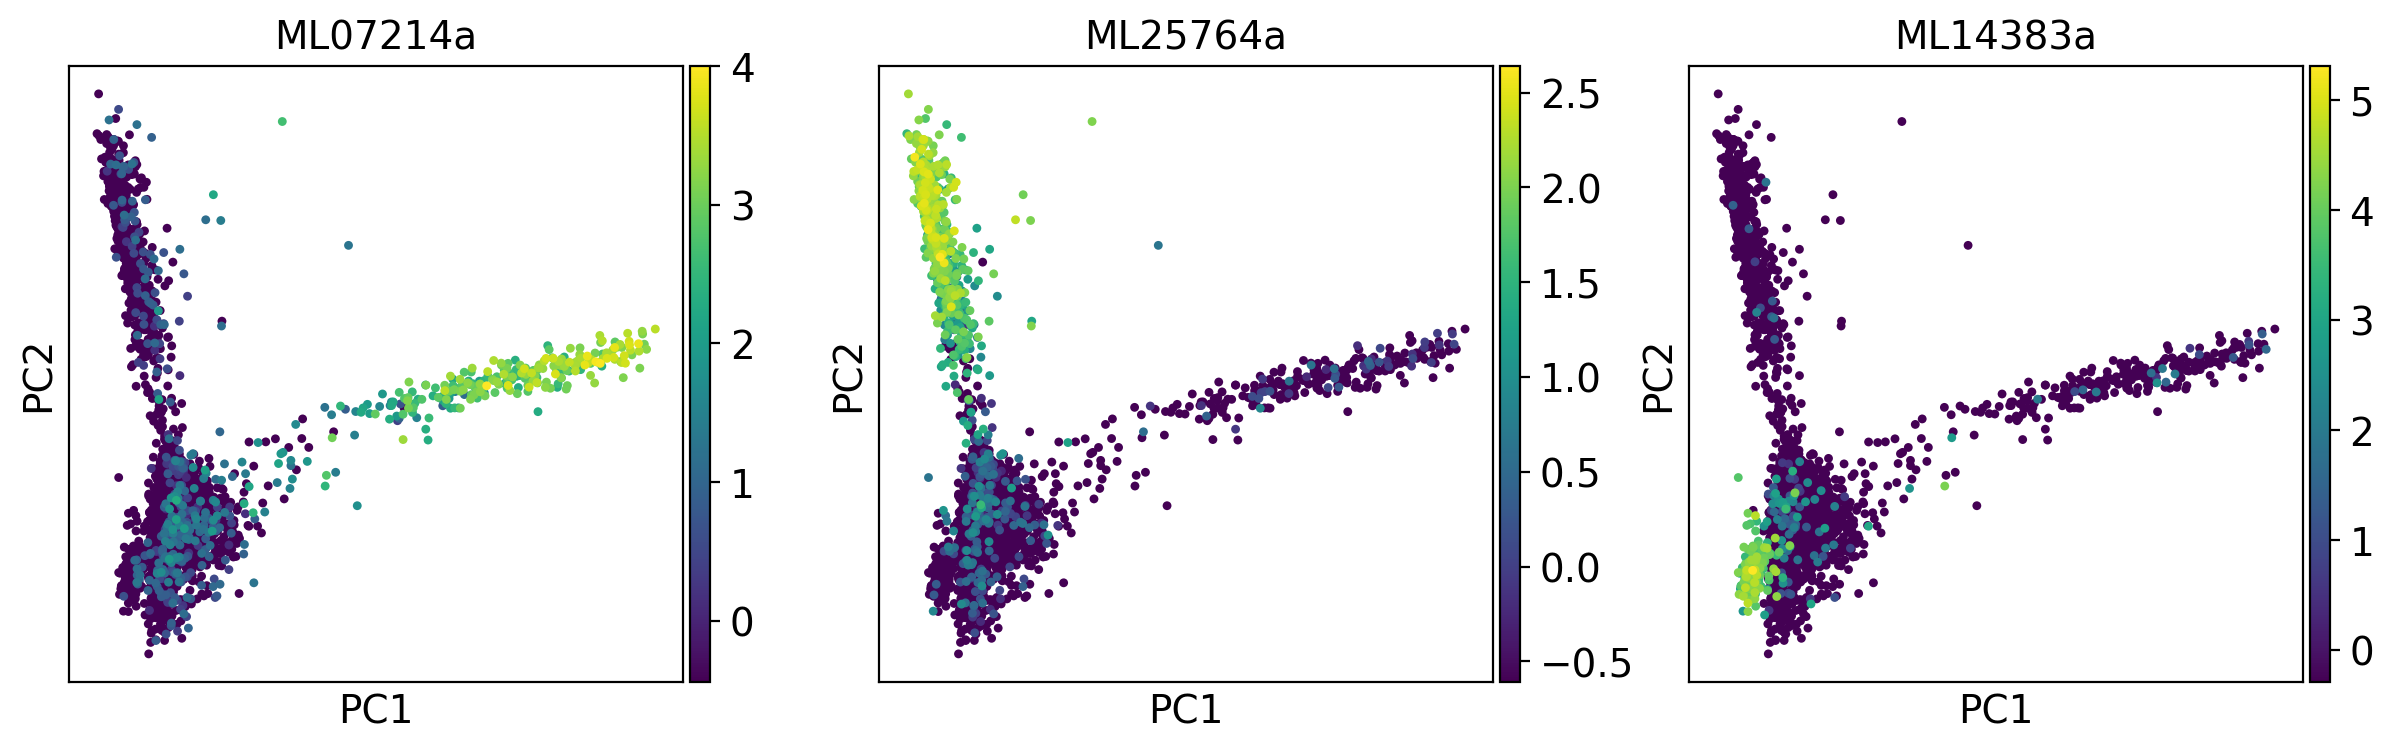

In [31]:
sc.pl.pca(adata, color=['ML07214a','ML25764a','ML14383a'], ncols = 3, hspace = 0.1, wspace = 0.2)

## вывод предыдущих графиков совместно с этими, с выбором генов для подсветки (вывод инфы о компонентах парами)

In [32]:
# !pip3 install --upgrade matplotlib


  Using cached matplotlib-3.5.1-cp38-cp38-manylinux_2_5_x86_64.manylinux1_x86_64.whl (11.3 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.0
    Uninstalling matplotlib-3.5.0:
      Successfully uninstalled matplotlib-3.5.0


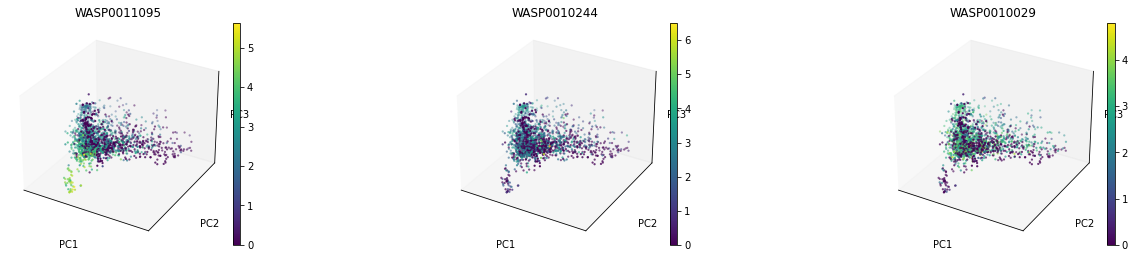

In [63]:
sc.pl.pca(adata, color=highest_expr.index[0:3], ncols = 3, hspace = 20, wspace = 0.2, projection = '3d')


Построение графа ближайших сосдей: ещё одни важные параметры для варьирования. Компоненты можно выбрать, на самом деле не наугад, а считая как-то производную (вот я пока не до конца разобралась, как, поэтому здесь они выбраны просто на глаз из графика выше). А соседей приходится варьировать (возможно, есть алгоритм оптимизации или критерий оптимального числа соседей, но я о нём не знаю).

In [64]:
sc.pp.neighbors(adata, n_neighbors=20, n_pcs=40)

In [65]:
sc.tl.umap(adata)

In [36]:
# !pip3 install leidenalg

     |████████████████████████████████| 1.3 MB 594 kB/s eta 0:00:01
     |████████████████████████████████| 3.2 MB 119 kB/s eta 0:00:01     |███████▉                        | 768 kB 993 kB/s eta 0:00:03
  Using cached texttable-1.6.4-py2.py3-none-any.whl (10 kB)


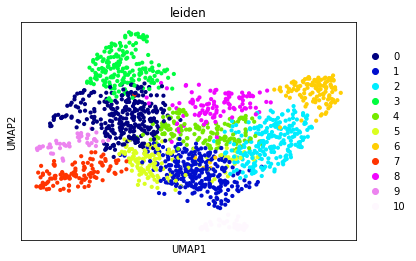

In [66]:
sc.tl.leiden(adata)
sc.pl.umap(adata, color='leiden', palette = 'gist_ncar')

##1. подсветка экспрессии выбранных генов
##2. отдельный анализ выбранного кластера или нескольких кластеров вместе (петля в пайплайне)
##3. Экспорт списка клеток с номерами кластеров или добавить эту инфу к исходной таблице или к таблице с координатами клеток по компонентам (значениями компонент)

##Что *должно* быть в mvp:
1. вывод картинки с кластерами и таблички с кластерами как файла 
2. интерактивный вывод с инфой по компонентам отдельно (+)
3. Далее дополнение по сути только по гибкости вычисления, выбора клеток/генов



In [67]:
adata.obs["leiden"]

ML000123a    2
ML000124a    7
ML00017a     6
ML00023a     0
ML000313a    2
            ..
bin_6289     2
bin_6963     6
bin_8204     0
bin_8215     0
bin_8246     2
Name: leiden, Length: 1715, dtype: category
Categories (11, object): ['0', '1', '2', '3', ..., '7', '8', '9', '10']

In [71]:
clusters_df = pd.DataFrame(adata.obs["leiden"])
clusters_df.to_csv("clusters.csv")
print(clusters_df)

          leiden
ML000123a      2
ML000124a      7
ML00017a       6
ML00023a       0
ML000313a      2
...          ...
bin_6289       2
bin_6963       6
bin_8204       0
bin_8215       0
bin_8246       2

[1715 rows x 1 columns]
